<a href="https://colab.research.google.com/github/Aayushmatkar/BMG5111-datascience-for-engineers/blob/main/Insomnia_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###testing csv file compatibility


In [2]:
import pandas as pd

# Read a CSV file into a Pandas DataFrame
df = pd.read_csv('sleepdata.csv')

# Print the DataFrame
print(df)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

##Cleaning the data


In [3]:
import pandas as pd
df = pd.read_csv('sleepdata.csv')

# Droping rows with 'Sleep Apnea' in the 'Sleep Disorder' column since we are only detecting insomnia
df_filtered = df[df['Sleep Disorder'] != 'Sleep Apnea']

# Display df
print(df_filtered)

# Save a new clean CSV file
df_filtered.to_csv('filtered_sleepdata.csv', index=False)

     Person ID  Gender  Age         Occupation  Sleep Duration  \
0            1    Male   27  Software Engineer             6.1   
1            2    Male   28             Doctor             6.2   
2            3    Male   28             Doctor             6.2   
5            6    Male   28  Software Engineer             5.9   
6            7    Male   29            Teacher             6.3   
..         ...     ...  ...                ...             ...   
341        342  Female   56             Doctor             8.2   
342        343  Female   56             Doctor             8.2   
343        344  Female   57              Nurse             8.1   
358        359  Female   59              Nurse             8.0   
359        360  Female   59              Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                   6                       42             6     Overweight   
1                   6                       60   

##comparing models with accuracy


Training and evaluating Random Forest...
Random Forest accuracy: 0.9662921348314607
Classification Report for Random Forest:
               precision    recall  f1-score   support

    Insomnia       0.95      0.91      0.93        22
        None       0.97      0.99      0.98        67

    accuracy                           0.97        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.97      0.97      0.97        89

Confusion Matrix for Random Forest:
 [[20  2]
 [ 1 66]]


Training and evaluating Gradient Boosting...
Gradient Boosting accuracy: 0.9662921348314607
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    Insomnia       0.95      0.91      0.93        22
        None       0.97      0.99      0.98        67

    accuracy                           0.97        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.97      0.97      0.97        89

Confusion Matrix for Gra

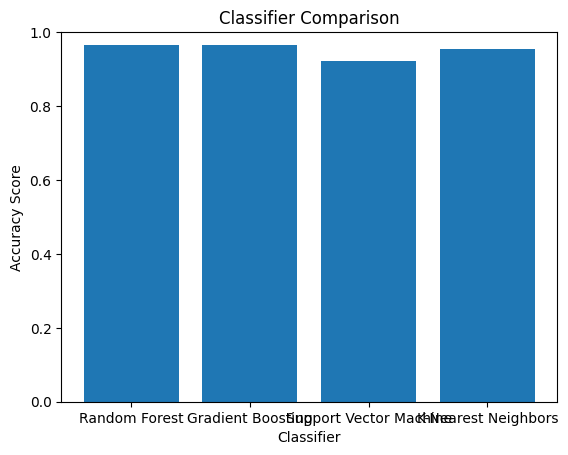

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read a CSV file into a Pandas DataFrame
df = pd.read_csv('filtered_sleepdata.csv')

# Handle missing values if any
df = df.dropna()

# Separate features and target
X = df[['Quality of Sleep', 'Sleep Duration', 'Stress Level', 'Physical Activity Level']]
y = df['Sleep Disorder']

# Normalize or standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store accuracy scores for visualization
accuracy_scores = {}

# Train and evaluate each classifier
for clf_name, classifier in classifiers.items():
    print(f"Training and evaluating {clf_name}...")

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[clf_name] = accuracy

    # Print classification report and confusion matrix
    print(f"{clf_name} accuracy: {accuracy}")
    print(f"Classification Report for {clf_name}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {clf_name}:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")  # Separator for better readability

# Plot the bar graph
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Classifier Comparison')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy scores
plt.show()

###Training the model with random Forest since higher accuracy




In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read a CSV file into a Pandas DataFrame
df = pd.read_csv('filtered_sleepdata.csv')

# Handle missing values if any
df = df.dropna()

# Separate features and target
X = df[['Quality of Sleep', 'Sleep Duration', 'Stress Level', 'Physical Activity Level']]
y = df['Sleep Disorder']

# Encode categorical variables if any

# Normalize or standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier (you can experiment with other classifiers)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Use appropriate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model accuracy: 0.9662921348314607
Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.95      0.91      0.93        22
        None       0.97      0.99      0.98        67

    accuracy                           0.97        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.97      0.97      0.97        89

Confusion Matrix:
 [[20  2]
 [ 1 66]]


###Exporting scaler since api needs the vectorisation


In [7]:
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

###Testing the model with an actual input string


In [8]:
quality_of_sleep = float(input("Enter your quality of sleep (1-10): "))
sleep_duration = float(input("Enter your sleep duration (hours): "))
stress_level = float(input("Enter your stress level (1-10): "))
physical_activity = float(input("Enter youractivity level (1-10): "))

# Create a feature vector
features = [quality_of_sleep, sleep_duration, stress_level,physical_activity]

# Predict the probability of insomnia
predicted_probability = model.predict_proba([features])[0][1]
print(predicted_probability)
# Print the prediction
if predicted_probability > 0.5:
  print("You are likely to have insomnia.")
else:
  print("You are unlikely to have insomnia.")


Enter your quality of sleep (1-10): 4
Enter your sleep duration (hours): 5
Enter your stress level (1-10): 8
Enter youractivity level (1-10): 2
0.9821774891774893
You are likely to have insomnia.
